### Initial Data Preparation

In [10]:
import pandas as pd

frame = pd.read_csv('Merged_Flight_Weather.csv')

In [11]:
frame = frame.drop(columns=[ 'time', 'date', 'FlightDate', 'DepTime','ArrDelayMinutes', 
                      'ArrTime'])

frame.drop_duplicates(inplace=True)

frame["Origin"] = frame["Origin"].astype('category')
frame["Dest"] = frame["Dest"].astype('category')


frame["Origin"] = frame["Origin"].cat.codes

frame["Dest"] = frame["Dest"].cat.codes

In [12]:
frame.drop(frame.columns[0], axis=1, inplace=True)
frame.shape

(20197718, 28)

In [13]:
frame.dropna(axis=0)

frame['weatherCode'] = frame['weatherCode'].astype(int)

frame['visibility'] = frame['visibility'].astype(int)
frame['pressure'] = frame['pressure'].astype(int)
frame['cloudcover'] = frame['cloudcover'].astype(int)
frame['DewPointF'] = frame['DewPointF'].astype(int)
frame['WindGustKmph'] = frame['WindGustKmph'].astype(int)
frame['tempF'] = frame['tempF'].astype(int)
frame['WindChillF'] = frame['WindChillF'].astype(int)
frame['tempF'] = frame['tempF'].astype(int)

frame['CRSArrTime'] = frame['CRSArrTime'].astype(int)
frame['CRSDepTime'] = frame['CRSDepTime'].astype(int)
frame['DayofMonth'] = frame['DayofMonth'].astype(int)

frame['DestAirportID'] = frame['DestAirportID'].astype(int)
frame['Month'] = frame['Month'].astype(int)
frame['Quarter'] = frame['Quarter'].astype(int)
frame['Year'] = frame['Year'].astype(int)
frame['OriginAirportID'] = frame['OriginAirportID'].astype(int)

frame.dtypes



index_x              int64
ArrDel15           float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
Dest                  int8
DestAirportID        int64
Month                int64
Origin                int8
OriginAirportID      int64
Quarter              int64
Year                 int64
DeptTime             int64
index_y              int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
dtype: object

In [14]:
frame["Origin"] = frame["Origin"].astype('category')
frame["Dest"] = frame["Dest"].astype('category')

In [15]:
frame = frame.drop(columns=['index_x', 'index_y'])

In [16]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(frame)

,ArrDel15,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,Dest,DestAirportID,Month,Origin,...,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity
0,0.0,1602.0,745.0,1.0,0.0,0.0,6.0,12478.0,1.0,13.0,...,296.0,1.4,9.0,1029.0,100.0,42.0,27.0,47.0,41.0,84.0
1,0.0,1602.0,745.0,1.0,0.0,0.0,6.0,12478.0,1.0,13.0,...,113.0,0.0,10.0,1045.0,0.0,-2.0,21.0,3.0,-9.0,80.0
2,0.0,1602.0,745.0,1.0,0.0,0.0,6.0,12478.0,1.0,13.0,...,113.0,0.0,10.0,1020.0,1.0,30.0,15.0,51.0,47.0,46.0
3,0.0,1602.0,745.0,1.0,0.0,0.0,6.0,12478.0,1.0,13.0,...,122.0,0.0,10.0,1025.0,100.0,38.0,23.0,42.0,34.0,92.0
4,0.0,1602.0,745.0,1.0,0.0,0.0,6.0,12478.0,1.0,13.0,...,143.0,0.0,4.0,1023.0,93.0,43.0,12.0,46.0,43.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20197713,1.0,428.0,130.0,14.0,1.0,48.0,2.0,11292.0,12.0,7.0,...,122.0,0.0,6.0,1011.0,70.0,17.0,26.0,22.0,9.0,82.0
20197714,1.0,428.0,130.0,14.0,1.0,48.0,2.0,11292.0,12.0,7.0,...,116.0,0.0,10.0,1029.0,28.0,35.0,10.0,40.0,37.0,81.0
20197715,1.0,428.0,130.0,14.0,1.0,48.0,2.0,11292.0,12.0,7.0,...,113.0,0.0,10.0,1018.0,0.0,6.0,30.0,45.0,40.0,20.0
20197716,1.0,428.0,130.0,14.0,1.0,48.0,2.0,11292.0,12.0,7.0,...,113.0,0.0,10.0,1018.0,0.0,36.0,18.0,49.0,48.0,60.0


In [17]:
y = frame['ArrDel15']
X = frame.drop(columns = ['ArrDel15'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### K means using elbow method

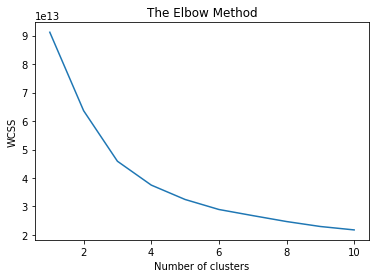

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [2]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

NameError: name 'KMeans' is not defined

In [20]:
print("The centroids are ", kmeans.cluster_centers_)

print("Assignments are: ")
print(kmeans.labels_)

The centroids are  [[1.46659415e+03 1.23737708e+03 1.57788099e+01 1.86594014e-01
  1.32005865e+01 2.32027515e+00 1.12429713e+04 6.55538668e+00
  1.02220784e+01 1.36385517e+04 2.51830612e+00 2.01668148e+03
  1.22357319e+03 1.20960988e+01 1.82877600e+02 1.46876197e+02
  2.87273020e-01 9.43401182e+00 1.01618920e+03 4.09258798e+01
  4.96910613e+01 1.66801868e+01 6.56141062e+01 6.43443003e+01
  6.30630546e+01]
 [1.51988538e+03 1.37655348e+03 1.57831381e+01 2.01385017e-01
  1.38090782e+01 1.02483632e+01 1.36534327e+04 6.57818810e+00
  1.94986066e+00 1.11061861e+04 2.52574765e+00 2.01668374e+03
  1.37950556e+03 1.24234454e+01 1.84446286e+02 1.47077465e+02
  2.96975701e-01 9.49059779e+00 1.01600083e+03 4.03763652e+01
  4.97739740e+01 1.69537501e+01 6.65726908e+01 6.53687740e+01
  6.14824957e+01]
 [1.49900888e+03 1.37453322e+03 1.57592624e+01 2.20822111e-01
  1.55848654e+01 1.02610519e+01 1.36776888e+04 6.52047866e+00
  7.32172366e+00 1.28004716e+04 2.50716579e+00 2.01667636e+03
  1.36559062e+0

### Dimensional analysis

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4520892  258608]
 [ 315721  964095]]


0.9052155391796698

As the data is supervised, PCA is not possible . As the data which I considered has only 2 classes for prediction, LDA is not supportable due to the below statement
n_components cannot be larger than min(n_features, n_classes - 1
).

So, dimensional analysis is not possible. the data can be viewd from clusters.

To perform dimensionl analysis, we need two axis, x-axis and y-axis. Here, number of classes are two, n_components min(features, n_classes-1) i.e. 2-1=1. min(features, 1), minimum is 1. So, we are getting only one axis, we cannot perform dimensional analysis with one axis.

#### What you have discovered in data?

As the data do not contain any anomolous data and the data is supervised, we can predict it with any supervised models like random forest, neural nets and regression to get best accuracy. For the dataset, we got 6
clusters as shown above. 

#### Anomolous data

There is no anomolous data for this dataset. Anomaly detection is identifying data points in data that don't fit the normal patterns. We usually perform anomaly detection to make it more effective, especially when large datasets are involved.

As explained above, The dataset do not have anomolous data.

### Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [1]:
y_pred = classifier.predict(X_test)

NameError: name 'classifier' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)